# Loading and analysing a single GRN or a population of GRNs

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import helper

In [2]:
# Load GRN

# Parameters
rule = 22
id = 1
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1 #which gene was used to get fitness

filename = f"results_new_rules/stats_300_{rule}-{rule}_69904-149796_{id}" + "_best_grn.txt"
grns = np.loadtxt(filename)
num_grns = int(grns.shape[0]/(grn_size+2)/grn_size)
grns = grns.reshape(num_grns,grn_size+2,grn_size)

if len(grns.shape) == 2:
    grns = np.expand_dims(grns, axis=0)
print(grns.shape)



(12, 24, 22)


In [3]:
# Get target, phenotype, and fitnesses
seed_int=1024 
#binary of initial condition of fitness gene. 1024 is 1 seed in the middle. other frequently used initial conditions: 69904, 149796
targets, phenos, fitnesses = helper.get_pop_TPF(grns, len(grns), num_cells, grn_size, dev_steps, geneid, rule, seed_int)

print(targets.shape)
print(phenos.shape)
print(fitnesses.shape)

(23, 22)
(12, 23, 22)
(12,)


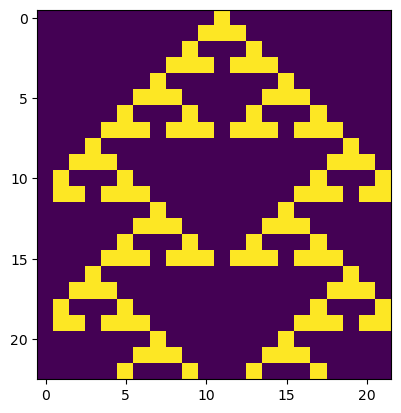

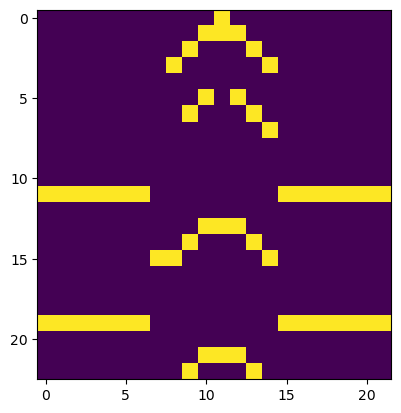

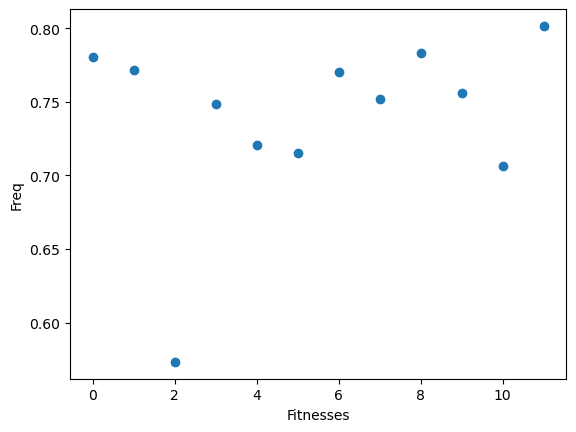

In [4]:
plt.imshow(targets)
plt.show()
plt.imshow(phenos[-1])
plt.show()
plt.scatter(list(range(len(fitnesses))), fitnesses)
plt.ylabel("Freq")
plt.xlabel("Fitnesses")
plt.show()

# Different initial conditions?

In [5]:
pop=np.array(grns)
targets=[]
phenos=[]
fits = []
seedints = [1024,69904,149796,4147842,1238860,2481300]
for seed_int in seedints:
    t, p, f = helper.get_pop_TPF(pop, 5, num_cells, grn_size, dev_steps, geneid, rule, seed_int)
    targets.append(t)
    phenos.append(p)
    fits.append(f)

targets=np.array(targets)
phenos=np.array(phenos)
fits=np.array(fits)


In [8]:
df = pd.DataFrame(fits.T, columns=["1 seed","4 seed", "6 seed", "random 1", "random 2", "random 3"])
df

,1 seed,4 seed,6 seed,random 1,random 2,random 3
0,0.780653,0.760668,0.776719,0.688033,0.632374,0.721207
1,0.771499,0.756608,0.788841,0.691482,0.634484,0.727462
2,0.573284,0.751032,0.797750,0.648152,0.585875,0.681343
3,0.748641,0.811628,0.729256,0.634245,0.601228,0.706612
4,0.720559,0.844906,0.727237,0.661130,0.599165,0.710744


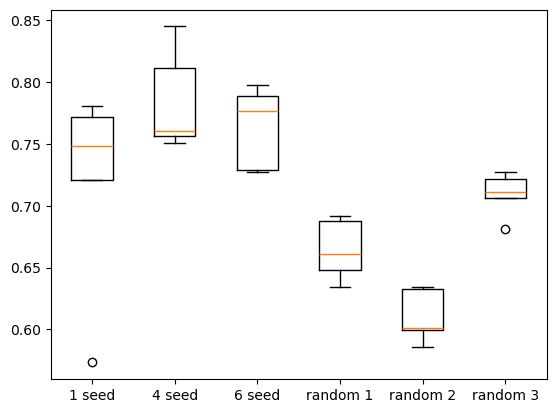

In [9]:
plt.boxplot([df[column] for column in df.columns], labels=df.columns)
plt.xticks(fontsize=10)
plt.show()


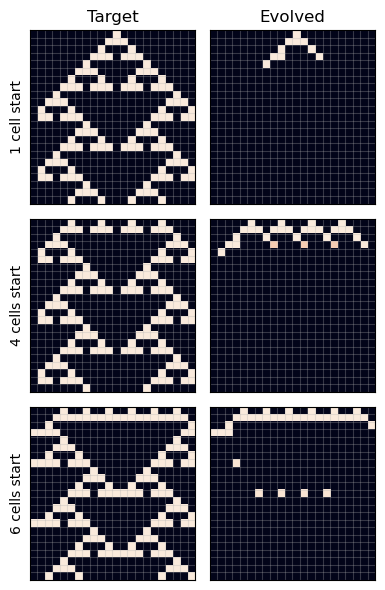

In [10]:
nrows = 3
ncols = 2
scale=2

id=0 #replicate id to plot, 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * scale, nrows*scale), sharex=True, sharey=True)
axs = axs.flatten()

counter=0
for i, ax in enumerate(axs):
    if i % 2 == 0:
        helper.imshow_ca(targets[counter],ax=ax)
    else:
        helper.imshow_ca(phenos[counter,id,:,:],ax=ax)
        counter+=1
    #ax.set_title(f"Rule: {rules[i]}", fontsize=16)

for ax, col in zip(axs, ["Target","Evolved"]):
    ax.set_title(col)

axs[0].set_ylabel("1 cell start")
axs[2].set_ylabel("4 cells start")
axs[4].set_ylabel("6 cells start")

plt.tight_layout()
#plt.savefig("figs/94_general.png")